<a href="https://colab.research.google.com/github/annefrancine/DataScience_Estiam/blob/main/marketbasketanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**R in google colab** : 
 https://colab.research.google.com/notebook#create=true&language=r

En data mining, on utilise la technique des règles d’association pour
déterminer les éléments qui se retrouvent ensembles.

- L’analyse du panier d’épicerie (« market basket analysis ») est un terme
plus spécifique au commerce au détail. Cette analyse utilise les règles
d’association.
- Dans une épicerie, les règles d’association décrivent les produits qui se
retrouvent dans le même panier

Définitions
- Transactions : achats fait par un seul client.
- Items : produits achetés.
- Règle d’association : énoncé de la forme (item X) - (item Y).

1.   Item X = produit à analyser
2.   Item Y = produit associé


Règle d’association :
 - On choisira d’étudier des règles d’association permettant d’en apprendre
davantage sur le comportement des clients. Les résultats de l’analyse devront
être utiles et pratiques.
 - On choisira un niveau de granularité. On peut étudier l’association entre des
ensembles de produits : ceux qui achètent des céréales achètent aussi du lait.
Ou l’association entre des produits plus précis : ceux qui achètent du vin rouge
bon marché achètent des cubes de bœuf pour ragoût

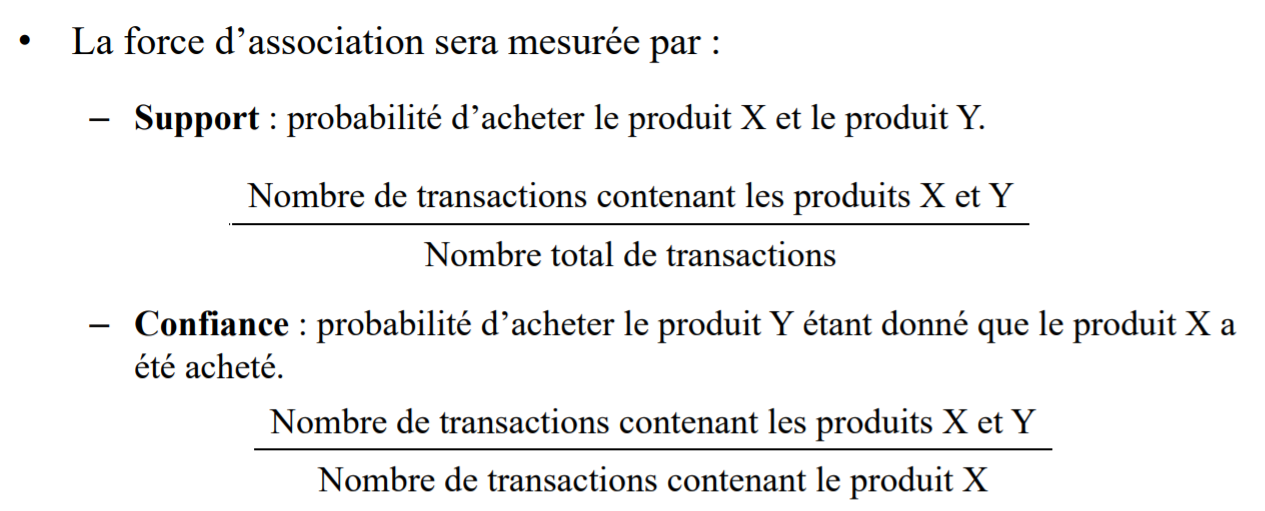

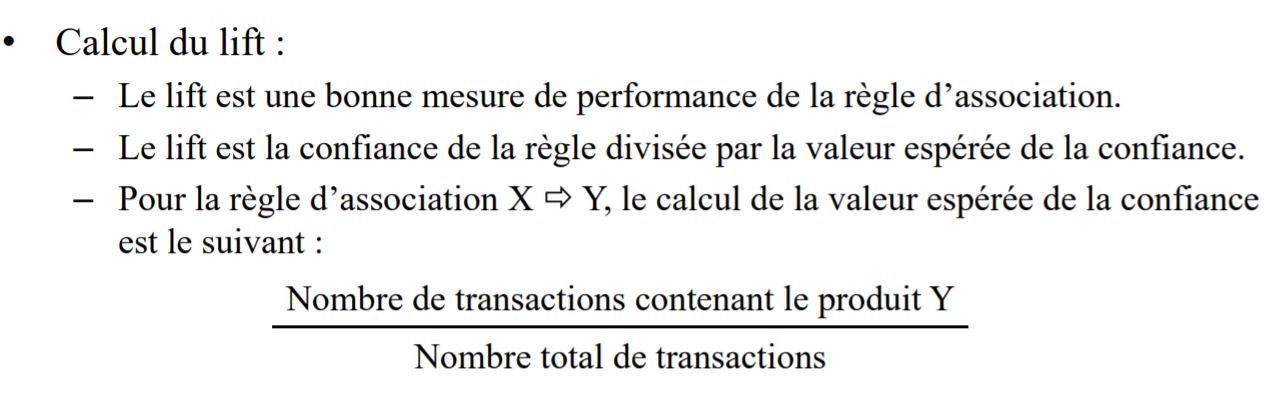

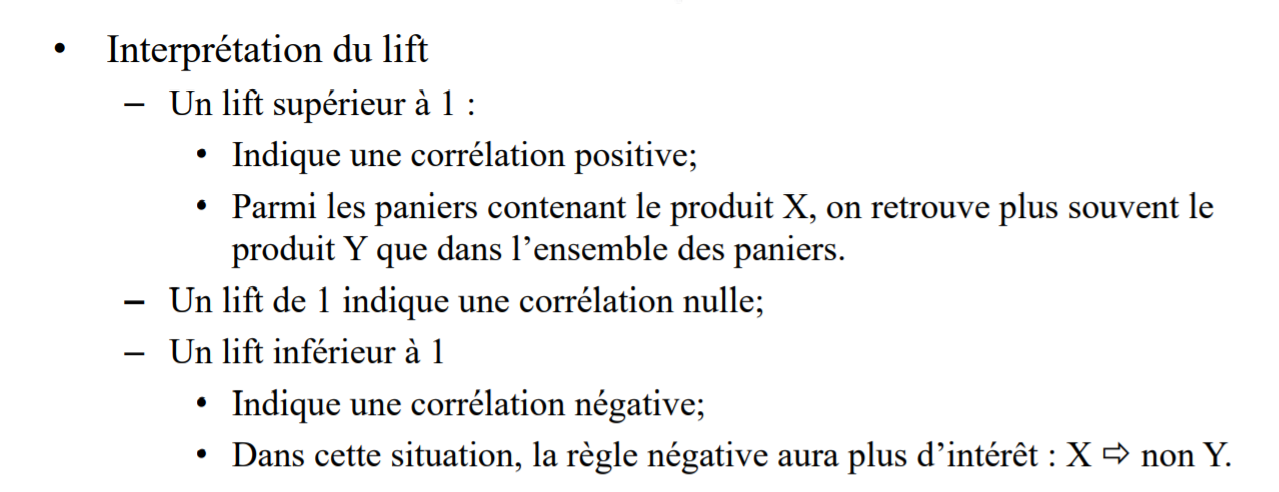

## 1) Installation de packages 

In [1]:
install.packages("arules")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(arules)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




## 2) Charger le dataset

In [3]:
data(Groceries)

## 3) Explorer et préparer les données

In [4]:
summary(Groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

In [5]:
 # Affichage des 5 premières transactions
 inspect(Groceries[1:5])

    items                     
[1] {citrus fruit,            
     semi-finished bread,     
     margarine,               
     ready soups}             
[2] {tropical fruit,          
     yogurt,                  
     coffee}                  
[3] {whole milk}              
[4] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[5] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}


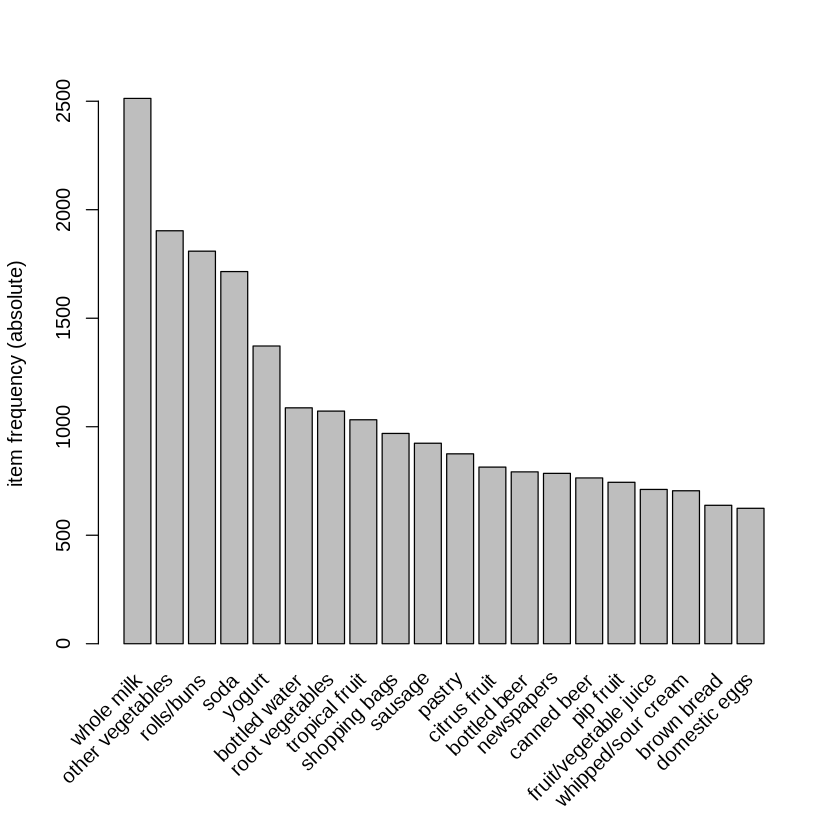

In [6]:
# Visualisation graphique des 20 éléments les plus fréquents (valeurs absolues et fréquence)
itemFrequencyPlot(Groceries,topN=20,type="absolute")

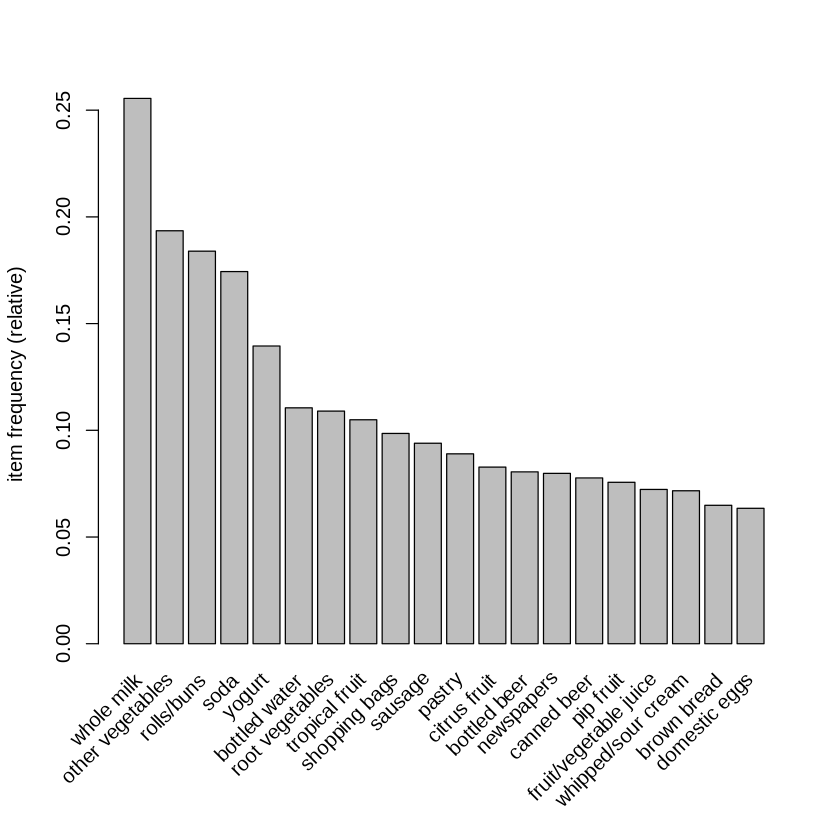

In [7]:
itemFrequencyPlot(Groceries,topN=20,type="relative")

## 3) Création de règles d'association

Nous sommes maintenant prêts à tester quelques règles ! Vous devrez toujours passer par le strict minimum de soutien et de confiance.

Dans un premier essai nous avons testé :

In [8]:
regle1 <- apriori(Groceries, parameter = list(supp = 0.001, conf = 0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [410 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [12]:
# Afficher les 5 premières lignes et la fixation d'output

options(digits=2)
inspect(regle1[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


Nous obtenons des informations récapitulatives sur les règles qui nous donnent des informations intéressantes, telles que:

- Le nombre de règles générées : 410 
- La répartition des règles par taille : la plupart des règles ont 4 items 
- Le résumé des mesures de qualité
- Informations sur les données extraites : données extraites totales et paramètres minimaux. Par exemple, si quelqu'un achète du yaourt et des céréales, 81 % des clients sont susceptibles d'acheter également du lait entier.

In [13]:
summary(regle1)

set of 410 rules

rule length distribution (lhs + rhs):sizes
  3   4   5   6 
 29 229 140  12 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0     4.0     4.0     4.3     5.0     6.0 

summary of quality measures:
    support          confidence      coverage           lift     
 Min.   :0.00102   Min.   :0.80   Min.   :0.0010   Min.   : 3.1  
 1st Qu.:0.00102   1st Qu.:0.83   1st Qu.:0.0012   1st Qu.: 3.3  
 Median :0.00122   Median :0.85   Median :0.0013   Median : 3.6  
 Mean   :0.00125   Mean   :0.87   Mean   :0.0014   Mean   : 4.0  
 3rd Qu.:0.00132   3rd Qu.:0.91   3rd Qu.:0.0016   3rd Qu.: 4.3  
 Max.   :0.00315   Max.   :1.00   Max.   :0.0036   Max.   :11.2  
     count     
 Min.   :10.0  
 1st Qu.:10.0  
 Median :12.0  
 Mean   :12.3  
 3rd Qu.:13.0  
 Max.   :31.0  

mining info:
      data ntransactions support confidence
 Groceries          9835   0.001        0.8

## 4)Créer une autre règle

In [16]:
regle2 <- apriori(Groceries, parameter = list(supp=0.002, conf=0.80, minlen = 4, maxlen=6))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      4
 maxlen target  ext
      6  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 19 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.01s].
writing ... [8 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [17]:
summary(regle2)

set of 8 rules

rule length distribution (lhs + rhs):sizes
4 5 
3 5 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0     4.0     5.0     4.6     5.0     5.0 

summary of quality measures:
    support          confidence      coverage           lift         count     
 Min.   :0.00203   Min.   :0.80   Min.   :0.0024   Min.   :3.2   Min.   :20.0  
 1st Qu.:0.00203   1st Qu.:0.81   1st Qu.:0.0025   1st Qu.:3.2   1st Qu.:20.0  
 Median :0.00224   Median :0.82   Median :0.0027   Median :3.3   Median :22.0  
 Mean   :0.00236   Mean   :0.83   Mean   :0.0028   Mean   :3.6   Mean   :23.2  
 3rd Qu.:0.00247   3rd Qu.:0.84   3rd Qu.:0.0030   3rd Qu.:4.1   3rd Qu.:24.2  
 Max.   :0.00315   Max.   :0.89   Max.   :0.0036   Max.   :4.6   Max.   :31.0  

mining info:
      data ntransactions support confidence
 Groceries          9835   0.002        0.8

In [18]:
# inspecter la règle2

inspect(regle2)

    lhs                        rhs                support confidence coverage lift count
[1] {tropical fruit,                                                                    
     grapes,                                                                            
     whole milk}            => {other vegetables}  0.0020       0.80   0.0025  4.1    20
[2] {other vegetables,                                                                  
     curd,                                                                              
     domestic eggs}         => {whole milk}        0.0028       0.82   0.0035  3.2    28
[3] {pork,                                                                              
     other vegetables,                                                                  
     butter}                => {whole milk}        0.0022       0.85   0.0026  3.3    22
[4] {root vegetables,                                                                   
     other vegetables

In [19]:
# Trier par les plus grands lifts
inspect(sort(regle2, by = "lift"))

    lhs                        rhs                support confidence coverage lift count
[1] {citrus fruit,                                                                      
     tropical fruit,                                                                    
     root vegetables,                                                                   
     whole milk}            => {other vegetables}  0.0032       0.89   0.0036  4.6    31
[2] {tropical fruit,                                                                    
     grapes,                                                                            
     whole milk}            => {other vegetables}  0.0020       0.80   0.0025  4.1    20
[3] {root vegetables,                                                                   
     whole milk,                                                                        
     yogurt,                                                                            
     fruit/vegetable 

## 5) Création de la règle 3

Trouver des sous-ensembles d'intérêt

In [20]:
regle3 <- apriori( Groceries, parameter = list(supp = 0.002, conf = 0.7, minlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.002      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 19 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.01s].
writing ... [94 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [21]:
summary(regle3)

set of 94 rules

rule length distribution (lhs + rhs):sizes
 3  4  5 
22 59 13 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0     4.0     4.0     3.9     4.0     5.0 

summary of quality measures:
    support         confidence      coverage           lift         count   
 Min.   :0.0020   Min.   :0.70   Min.   :0.0024   Min.   :2.7   Min.   :20  
 1st Qu.:0.0021   1st Qu.:0.71   1st Qu.:0.0028   1st Qu.:2.8   1st Qu.:21  
 Median :0.0024   Median :0.74   Median :0.0032   Median :3.0   Median :24  
 Mean   :0.0026   Mean   :0.75   Mean   :0.0035   Mean   :3.2   Mean   :26  
 3rd Qu.:0.0027   3rd Qu.:0.77   3rd Qu.:0.0037   3rd Qu.:3.5   3rd Qu.:27  
 Max.   :0.0057   Max.   :0.89   Max.   :0.0081   Max.   :4.6   Max.   :56  

mining info:
      data ntransactions support confidence
 Groceries          9835   0.002        0.7

In [22]:
inspect(sort(regle3[1:20], decreasing = TRUE, by = "lift"))

     lhs                                   rhs                support
[1]  {whipped/sour cream,soft cheese}   => {other vegetables} 0.0022 
[2]  {root vegetables,soft cheese}      => {other vegetables} 0.0024 
[3]  {citrus fruit,herbs}               => {other vegetables} 0.0021 
[4]  {root vegetables,baking powder}    => {other vegetables} 0.0025 
[5]  {root vegetables,rice}             => {other vegetables} 0.0022 
[6]  {tropical fruit,herbs}             => {whole milk}       0.0023 
[7]  {hamburger meat,curd}              => {whole milk}       0.0025 
[8]  {herbs,rolls/buns}                 => {whole milk}       0.0024 
[9]  {root vegetables,rice}             => {whole milk}       0.0024 
[10] {butter milk,whipped/sour cream}   => {whole milk}       0.0029 
[11] {onions,butter}                    => {whole milk}       0.0031 
[12] {butter,soft cheese}               => {whole milk}       0.0020 
[13] {cream cheese ,sugar}              => {whole milk}       0.0020 
[14] {butter,curd}  

## 6) Recherche de sous-ensembles avec l'élément beef 

In [23]:
regle_beef <- subset(regle3, items %in% "beef")

inspect(regle_beef)

    lhs                   rhs                support confidence coverage lift count
[1] {beef,                                                                         
     other vegetables,                                                             
     domestic eggs}    => {whole milk}        0.0025       0.76   0.0034  3.0    25
[2] {beef,                                                                         
     tropical fruit,                                                               
     root vegetables}  => {other vegetables}  0.0027       0.73   0.0038  3.8    27
[3] {beef,                                                                         
     tropical fruit,                                                               
     rolls/buns}       => {whole milk}        0.0021       0.78   0.0027  3.0    21


## 7) Trouver des règles segmentées

Segmentation 1 - Qu'achètent les clients avant d'acheter un produit particulier (beef) ?

In [24]:
regle3_seg1 <- apriori( Groceries, parameter = list(sup = 0.002, conf = 0.2),
                                   appearance = list(default = "lhs", rhs="beef"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 19 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.01s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [25]:
inspect(regle3_seg1)

     lhs                   rhs    support confidence coverage lift count
[1]  {pork,                                                             
      root vegetables}  => {beef}  0.0027       0.20   0.0136  3.8    27
[2]  {root vegetables,                                                  
      butter}           => {beef}  0.0029       0.23   0.0129  4.4    29
[3]  {root vegetables,                                                  
      newspapers}       => {beef}  0.0027       0.24   0.0115  4.6    27
[4]  {citrus fruit,                                                     
      root vegetables}  => {beef}  0.0039       0.22   0.0177  4.2    38
[5]  {root vegetables,                                                  
      soda}             => {beef}  0.0040       0.21   0.0186  4.1    39
[6]  {root vegetables,                                                  
      rolls/buns}       => {beef}  0.0050       0.21   0.0243  3.9    49
[7]  {pork,                                        

Segmentation 2 - Ce que les clients achètent après avoir acheté un produit particulier (beef)?

In [32]:
regle3_seg2 <- apriori( Groceries, parameter = list(sup = 0.002, conf = 0.2),
                                   appearance = list(default = "rhs", lhs="beef"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 19 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [147 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [6 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


## 8) Visualisation graphique des règles créées :

In [29]:
install.packages('arulesViz')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sna’, ‘ggnetwork’, ‘plotly’




In [30]:
library(arulesViz)

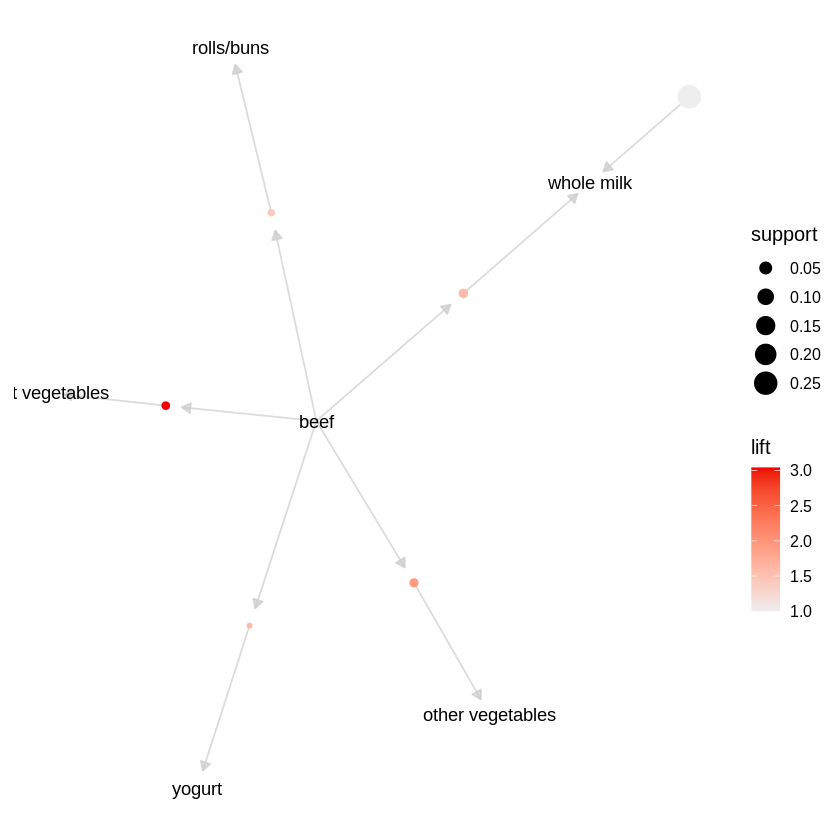

In [33]:
# Visualisation graphique des règles créées, il est également possible d'utiliser la méthode interactive

plot(regle3_seg2, method = "graph")